# 1. Imports

In [27]:
# Linear algebra and reading csv
import numpy as np
import pandas as pd

# Ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Data

In [2]:
df = pd.read_csv("../data/GMS_Dataset.csv")
df.head()

,person_id,Age,GenderCategory,RaceCategory,EthnicityCategory,Region,Glipizide_Indicator,Glimepiride_Indicator,Glyburide_Indicator,Metformin_Indicator,Pioglitazone_Indicator,Rosiglitazone_Indicator,DMDrug_Indicator,DMScreen_Indicator,A1C_Indicator,GlucoseTest_Indicator,InsulinTest_Indicator,AnyLab_Indicator,Diabetes_Indicator
0,1,100,1,1,1,2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,80,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,3,87,2,1,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,82,1,3,2,4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,87,1,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 3. Data Stats and charcteristics

In [3]:
def get_data_char(df):
    data_columns = df.columns
    data_char_df = pd.DataFrame(df.dtypes, columns = ["d_type"])
    data_char_df["#_missing"] = df.isna().sum()
    data_char_df["%_missing"] = df.isna().sum() * 100 / df.shape[0]
    data_char_df["#_unique"] = df.nunique()
    data_char_df["%_unique"] = df.nunique() * 100 / df.shape[0]
    data_char_df["most_frequent"] = df.mode().loc[0]
    
    def get_stats_stats(df):
        return df.aggregate(["min", "max", "mean", "median", "std"]).T
    
    data_char_df = pd.concat([data_char_df,get_stats_stats(df), df.loc[:2,].T], axis = 1)    
    
    return data_char_df
display(get_data_char(df.iloc[:,1:]).style.background_gradient(subset = ["%_unique", "std", "median", "mean", "max", "min", "%_missing"], cmap = "Oranges"))

,d_type,#_missing,%_missing,#_unique,%_unique,most_frequent,min,max,mean,median,std,0,1,2
Age,int64,0,0.000000,70,7.000000,85.000000,40.000000,114.000000,86.762000,87.000000,12.044519,100.000000,80.000000,87.000000
GenderCategory,int64,0,0.000000,2,0.200000,2.000000,1.000000,2.000000,1.539000,2.000000,0.498726,1.000000,1.000000,2.000000
RaceCategory,int64,0,0.000000,3,0.300000,1.000000,1.000000,3.000000,1.215000,1.000000,0.539505,1.000000,1.000000,1.000000
EthnicityCategory,int64,0,0.000000,2,0.200000,1.000000,1.000000,2.000000,1.020000,1.000000,0.140070,1.000000,1.000000,1.000000
Region,int64,0,0.000000,5,0.500000,3.000000,1.000000,5.000000,2.619000,3.000000,1.054965,2.000000,1.000000,1.000000
Glipizide_Indicator,float64,20,2.000000,2,0.200000,0.000000,0.000000,1.000000,0.250000,0.000000,0.433234,1.000000,0.000000,1.000000
Glimepiride_Indicator,float64,20,2.000000,2,0.200000,0.000000,0.000000,1.000000,0.114286,0.000000,0.318320,0.000000,0.000000,0.000000
Glyburide_Indicator,float64,20,2.000000,2,0.200000,0.000000,0.000000,1.000000,0.283673,0.000000,0.451010,1.000000,0.000000,1.000000
Metformin_Indicator,float64,20,2.000000,2,0.200000,0.000000,0.000000,1.000000,0.307143,0.000000,0.461545,1.000000,0.000000,0.000000
Pioglitazone_Indicator,float64,20,2.000000,2,0.200000,0.000000,0.000000,1.000000,0.061224,0.000000,0.239864,0.000000,0.000000,0.000000


### Insights:
1. X: We have 17 independent variable, all of which are categorical in nature, except age which is interger. 
2. Y: The target "Diabetes_Indicator" is a binary variable, meaning this is a Binary Classification task
3. The dataset has missing values, and these are in the indicator columns.
4. Most unique column is Age with just 7% unique data, of which mmost frequent is 85.
5. All 11 indicator features except "A1C" have higher number of False indictor values except as their mean < 0.5
5. There are 4 columns with the most missing datapoints(123). This is interesting as all four columns have the same number of missing datapoints. This suggest that all four values of a row might be missing.
6. The target varible has a mean > 0.5 and median of 1, indicating that the number of positive class (+1) examples are larger than that of number of negative class examples (0)
                                     

## 3.1 Identify kind of missing data pattern:

We identify a pattern of missing datapoints:

1. In the set of 20 missing datapoints
2. In the set of 123 missing datapoints
3. In the set of 70 missing datapoints for target variable

### 3.1.1 Identify pattern in 20 datapoints 
1. Glipizide_Indicator
2. Glimepiride_Indicator
3. Glyburide_Indicator
4. Metformin_Indicator
5. Pioglitazone_Indicator 
6. Rosiglitazone_Indicator
7. DMDrug_Indicator

In [4]:
df[df["Glipizide_Indicator"].isna()].isna().sum()

person_id                   0
Age                         0
GenderCategory              0
RaceCategory                0
EthnicityCategory           0
Region                      0
Glipizide_Indicator        20
Glimepiride_Indicator      20
Glyburide_Indicator        20
Metformin_Indicator        20
Pioglitazone_Indicator     20
Rosiglitazone_Indicator    20
DMDrug_Indicator           20
DMScreen_Indicator         15
A1C_Indicator              16
GlucoseTest_Indicator      16
InsulinTest_Indicator      16
AnyLab_Indicator           16
Diabetes_Indicator         15
dtype: int64

#### Insight:
1. It appears there is a connection with above 7 indicators, as all columns have identical missing 20 datapoints together.
2. This pattern is appears to be either:
    1. _Missing Not at Random_: As it is possible that these column represent individuals who didn't take any medications 
    2. _Missing at Random_: There might be some systematic reason why the information is missing, maybe these were missed for a subgroup of participants.

### 3.1.2 Identify patterns in 123 missing datapoints for: 
1. A1C_Indicator
2. GlucoseTest_Indicator	
3. InsulinTest_Indicator
4. AnyLab_Indicator

In [5]:
df[df["A1C_Indicator"].isna()].isna().sum()

person_id                    0
Age                          0
GenderCategory               0
RaceCategory                 0
EthnicityCategory            0
Region                       0
Glipizide_Indicator         16
Glimepiride_Indicator       16
Glyburide_Indicator         16
Metformin_Indicator         16
Pioglitazone_Indicator      16
Rosiglitazone_Indicator     16
DMDrug_Indicator            16
DMScreen_Indicator          62
A1C_Indicator              123
GlucoseTest_Indicator      123
InsulinTest_Indicator      123
AnyLab_Indicator           123
Diabetes_Indicator          67
dtype: int64

#### Insight:
Like previously, it appears there is a connection with above 4 indicators, as all columns have identical missing 123 datapoints together, might be **MNAR** or **MAR**.

### 3.1.3 Identify patterns in 70 missing datapoints for target variable

In [6]:
df[df["Diabetes_Indicator"].isna()].isna().sum()

person_id                   0
Age                         0
GenderCategory              0
RaceCategory                0
EthnicityCategory           0
Region                      0
Glipizide_Indicator        15
Glimepiride_Indicator      15
Glyburide_Indicator        15
Metformin_Indicator        15
Pioglitazone_Indicator     15
Rosiglitazone_Indicator    15
DMDrug_Indicator           15
DMScreen_Indicator         62
A1C_Indicator              67
GlucoseTest_Indicator      67
InsulinTest_Indicator      67
AnyLab_Indicator           67
Diabetes_Indicator         70
dtype: int64

#### Insight:
All rows with missing Diabetes_Indicator has some other missing datapoint.

## 3.2 Duplicate rows

In [7]:
df = df.drop("person_id", axis = 1)
df[df.duplicated()]

,Age,GenderCategory,RaceCategory,EthnicityCategory,Region,Glipizide_Indicator,Glimepiride_Indicator,Glyburide_Indicator,Metformin_Indicator,Pioglitazone_Indicator,Rosiglitazone_Indicator,DMDrug_Indicator,DMScreen_Indicator,A1C_Indicator,GlucoseTest_Indicator,InsulinTest_Indicator,AnyLab_Indicator,Diabetes_Indicator
282,99,2,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
287,87,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
350,86,2,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368,95,2,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
380,97,2,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,83,2,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
968,82,1,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
973,90,2,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
977,86,2,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Insights:
1. There are 71 duplicated rows

# 4. EDA

In this section, we explore the traits of features and relationships among the features, we explore univarite, bivariate and finally multivariate relationships.

In [15]:
cat_cols = df.columns[1:-1]
num_cols = df.columns[0:1]
target_cols = df.columns[-1:]

print("Categorical columns:", cat_cols)
print("Numerical columns:",num_cols)
print("Target column:", target_cols)

Categorical columns: Index(['GenderCategory', 'RaceCategory', 'EthnicityCategory', 'Region',
       'Glipizide_Indicator', 'Glimepiride_Indicator', 'Glyburide_Indicator',
       'Metformin_Indicator', 'Pioglitazone_Indicator',
       'Rosiglitazone_Indicator', 'DMDrug_Indicator', 'DMScreen_Indicator',
       'A1C_Indicator', 'GlucoseTest_Indicator', 'InsulinTest_Indicator',
       'AnyLab_Indicator'],
      dtype='object')
Numerical columns: Index(['Age'], dtype='object')
Target column: Index(['Diabetes_Indicator'], dtype='object')


In [10]:
def map_df(data):
    data["GenderCategory"] = data["GenderCategory"].map({1: "Female", 2: "Male"})
    data["RaceCategory"] = data["RaceCategory"].map({1:"White", 2:"Black", 3:"Unknown"})
    data["EthnicityCategory"] = data["EthnicityCategory"].map({1: "Non-Hispanic", 2:"Hispanic", 3: "Unknown"})
    data["Region"] = data["Region"].map({1: "Northeast", 2: "Midwest", 3: "South", 4: "West", 5: "Unknown"})

    return data

df_eda = map_df(df.copy(deep = True))

## 4.1 Univariate

### 4.1.1 Target Variable

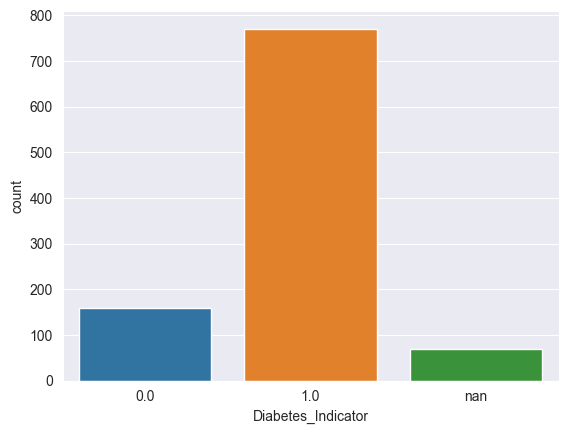

In [13]:
sns.countplot(x = df_eda["Diabetes_Indicator"].fillna("nan"), palette=sns.color_palette("tab10"));

### 4.1.2 Dependent varibles

In [30]:
df_eda[cat_cols[i]].fillna("nan").value_counts()

AnyLab_Indicator
1.0    589
0.0    288
nan    123
Name: count, dtype: int64

#### 4.1.2.1 Categorical

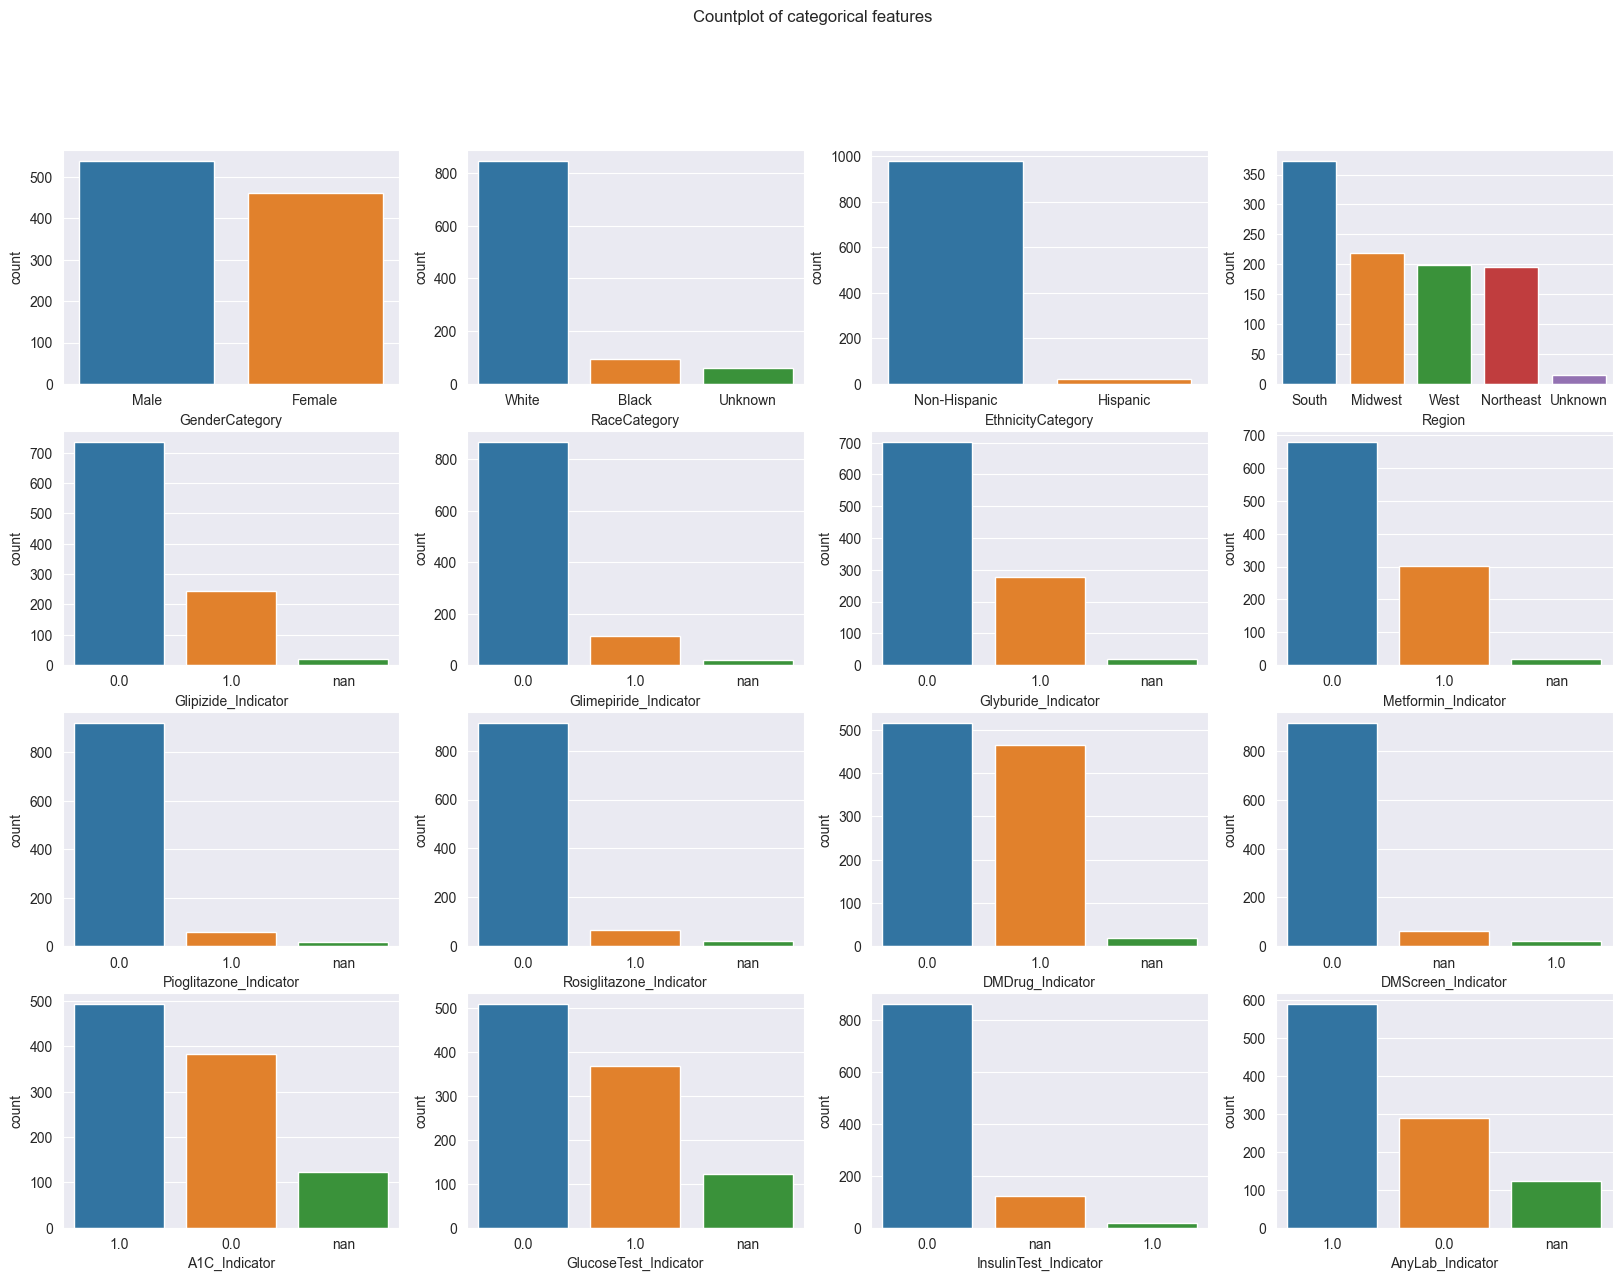

In [39]:
fig, axes = plt.subplots(4, 4, figsize = (20,14))
fig.suptitle('Countplot of categorical features')
for i in range(16):
    sns.countplot(
        x = df_eda[cat_cols[i]].fillna("nan"),
        palette=sns.color_palette("tab10"), 
        order = df_eda[cat_cols[i]].fillna("nan").value_counts().index,
        ax = axes[i//4, i%4])
plt.show()

#### Insights:

1. The dataset has higher men and is has high imbalances for the race and ethinicity.
2. The dataset is focused from people in different parts of the country with South having the highesh percentage.
3. As for the 2 out of 11 indicator features, "InsulinTest_Indicators" and "DMScreen_Indicator" has more nans than one of the permissible values for the column.
4. For all 11 indicator features, except A1C, all have higher False indication values.

#### 4.1.2.1 Numerical

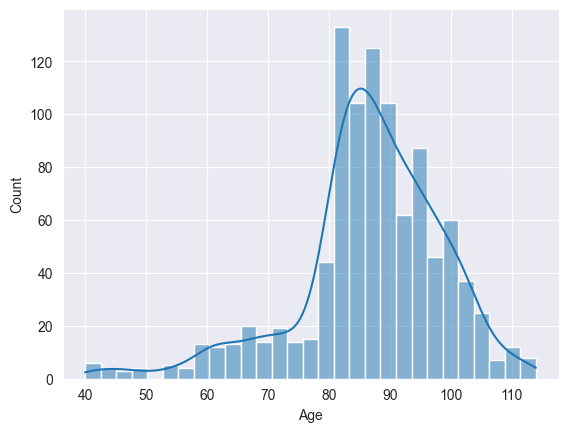

In [40]:
sns.histplot(data = df_eda, x = "Age", kde = True, palette=sns.color_palette("tab10"));

#### Insights:

1. The "Age" follows a somewhat Normal distribution with a slight skewness to the left.
2. The median and mean are 87 and 86.76 respectively.

## 4.2 Bivariavte

### 4.2.1 Relation of dependent features with target

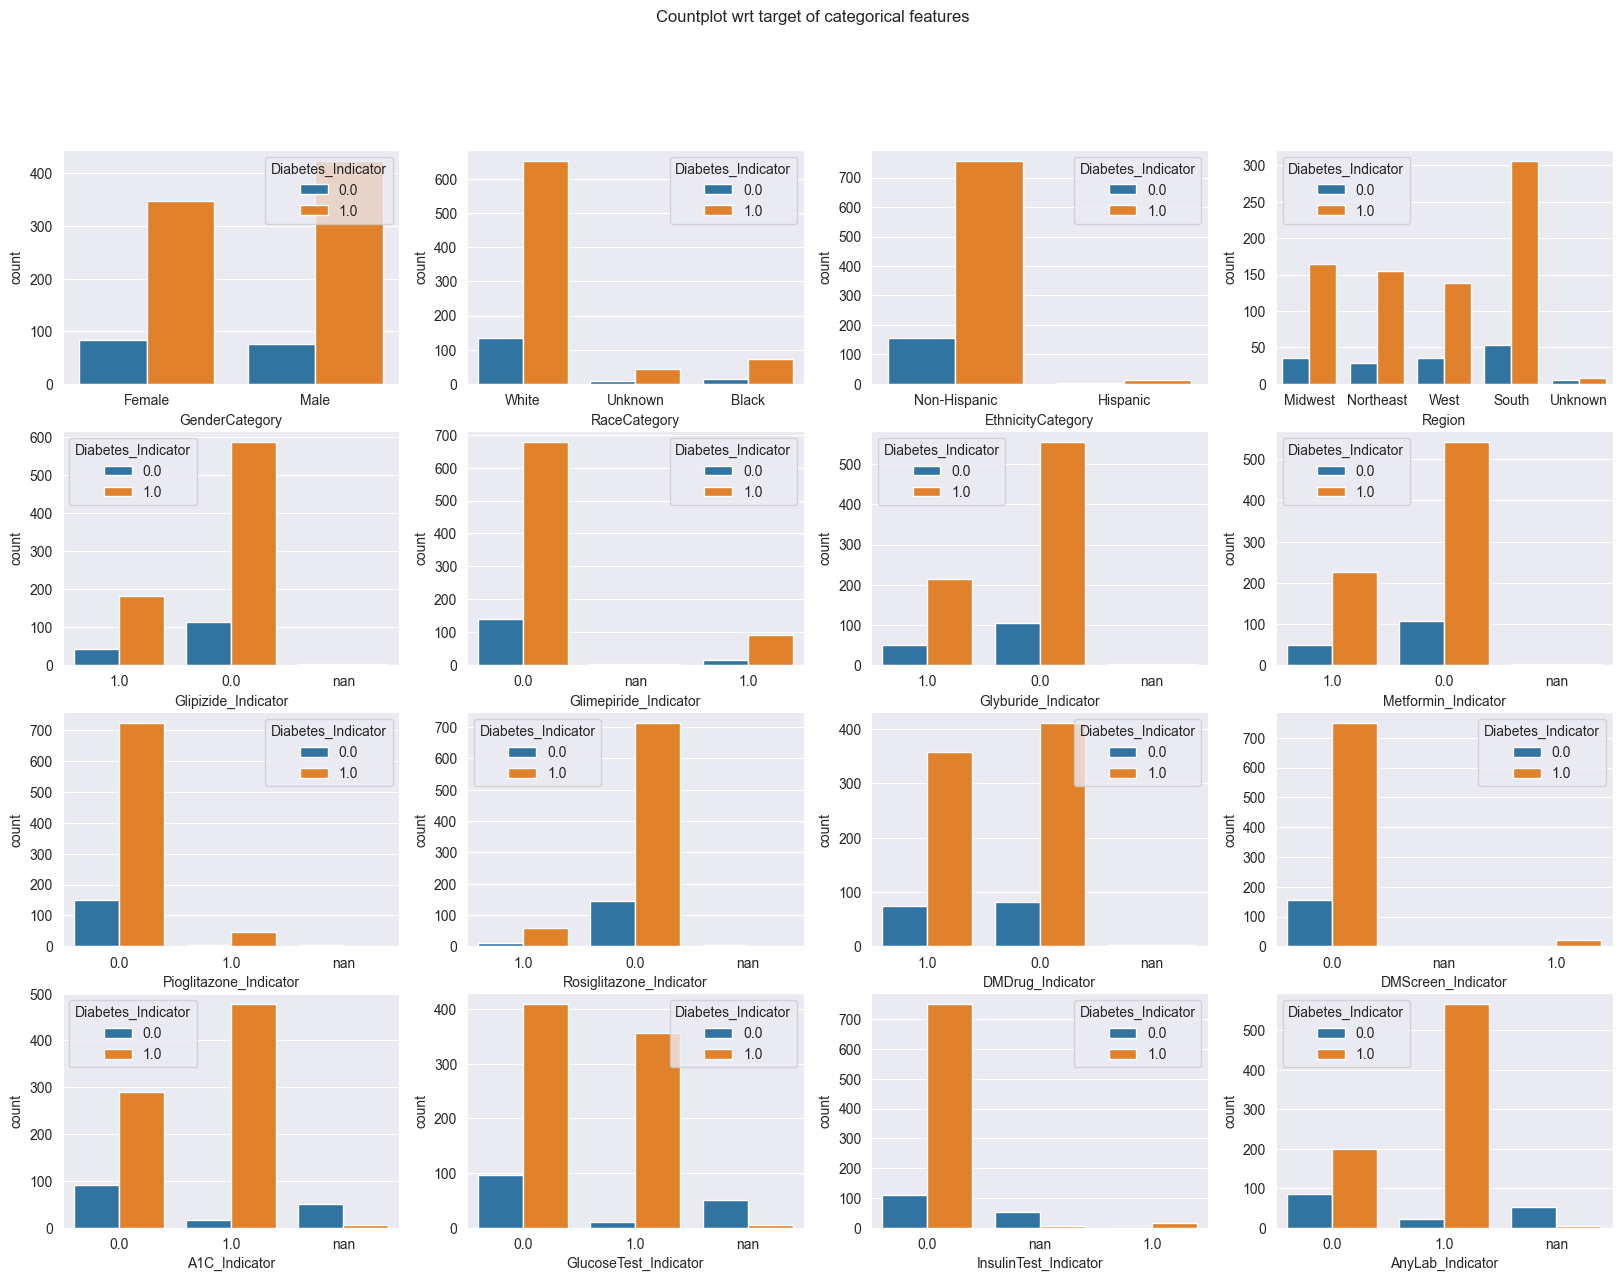

In [44]:
fig, axes = plt.subplots(4, 4, figsize = (20,14))
fig.suptitle('Countplot wrt target of categorical features')
for i in range(16):
    sns.countplot(
        x = df_eda[cat_cols[i]].fillna("nan"), 
        palette=sns.color_palette("tab10"), 
        hue = df_eda["Diabetes_Indicator"],
        ax = axes[i//4, i%4])
plt.show()

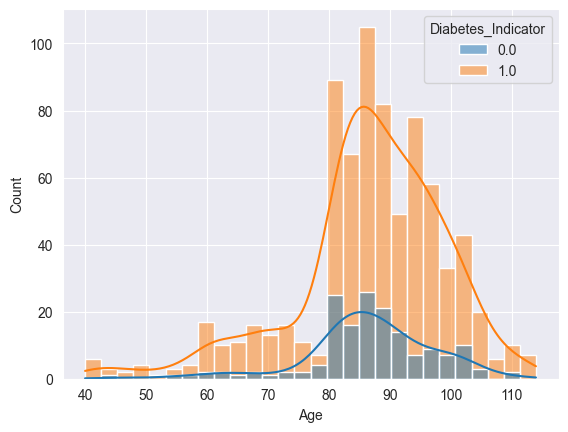

In [41]:
sns.histplot(data = df_eda, x = "Age", kde = True, hue = "Diabetes_Indicator", palette=sns.color_palette("tab10"));

## 4.3 Multivariate Heatmap - Cramer's V
Since most of the variable are categorical, Cramer's V correlation makes more sense.

In [20]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0] 
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1 
    return np.sqrt(stat/(obs*mini))


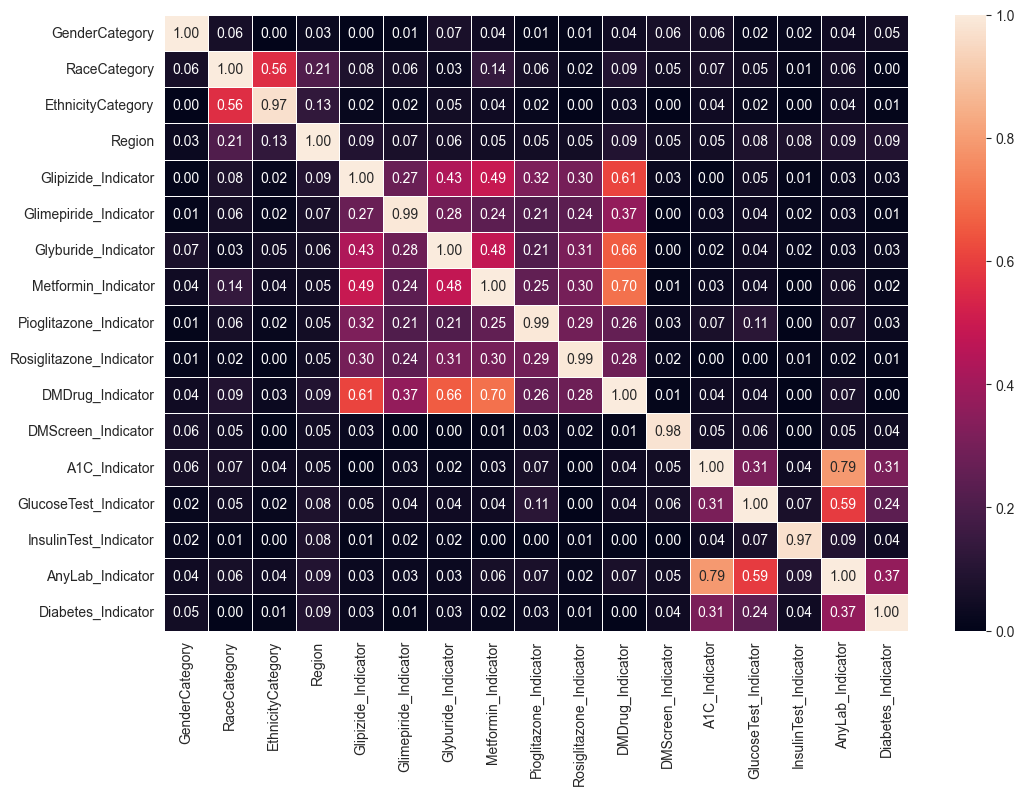

In [43]:
df_corr = df_eda.drop("Age", axis = 1)
rows= []
for var1 in df_corr:
    col = []
    for var2 in df_corr :
        cramers =cramers_V(df_corr[var1], df_corr[var2])
        col.append(round(cramers,2))
    rows.append(col)
  
cramers_results = np.array(rows)
df_corr_cramers = pd.DataFrame(cramers_results, columns = df_corr.columns, index =df_corr.columns)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_corr_cramers, annot = True, fmt = ".2f", ax=ax, linewidths=.5);



#### Insight:
1. High correlation with DMDrug_Indicator:
    Glipizide_Indicator (0.61), Glyburide_Indicator (0.66), Metformin_Indicator (0.70)

2. High correlation with AnyLab_Indicator:
A1C_Indicator (0.79), GlucoseTest_Indicator (0.59)

3. Diabetes_Indicator is weak correlation with AnyLab_Indicator (0.37) and A1C_Indicator (0.31)

## 4.4. Y_Data Profiling

In [44]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')

In [45]:
profile.to_file("output_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
profile